In [ ]:
import re

test = '$1,547,412.74'
# float(re.findall('[+-]?\d*\.\d+ | \d+', test))
# print(float(''.join(re.findall('[+-]?\d*\.\d+|\d+', test))))
print(float(''.join(re.findall('[.e+-]?[0-9]', test))))
re.findall('[e.+-]?[0-9]+', test)

In [ ]:
from datetime import date, timedelta

t1 = datetime.date(2019, 10, 20)
print(t1)
t2 = t1 - datetime.timedelta(weeks = 1)
print(t2)
type(t2)
str(t1)
t2.strftime('%Y-%m-%d')

In [ ]:
t0 = datetime.date(2019, 8, 18)
t0 < t1
# for d in range(t0, t1, datetime.timedelta(weeks = 1)):
#     print(d)

In [ ]:
start_date = date(2019, 10, 13)
end_date = date(2019, 8, 18)

type((start_date - end_date).days)

### Data Processing

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

In [42]:
df = pd.read_csv('Broadway_Shows/Broadway Shows Data.csv')
df.head()
df['week'] = pd.to_datetime(df['week'])
df['month'] = df.week.map(lambda d: d.month)
df['year'] = df.week.map(lambda d: d.year)
df['max_seats'] = df['theater_size'] * (df['performance'] + df['preview'])

In [43]:
# df.describe()
df.head(3)

,attendance_rate,avg_price,performance,preview,seats_sold,show,theater,theater_size,top_price,week,weekly_gross,month,year,max_seats
0,0.9591,137.15,8,0,10926,Ain't Too Proud - The Life and Times of the Te...,Imperial Theatre,1424,297.0,2019-10-06,1498490.8,10,2019,11392
1,0.9637,90.40,8,0,13314,Aladdin,New Amsterdam Theatre,1727,227.5,2019-10-06,1203519.4,10,2019,13816
2,0.9825,112.30,8,0,8064,Beautiful: The Carole King Musical,Stephen Sondheim Theatre,1026,247.0,2019-10-06,905609.6,10,2019,8208


In [22]:
# datetime.strptime(df['week'][0], '%Y-%m-%d').date().month

In [55]:
lst = ['attendance_rate', 'avg_price', 'performance', 'preview', 'seats_sold', 'theater', 'theater_size', 'weekly_gross', 'month', 'year', 'max_seats']
grp_show[lst].sum().reset_index()
df_b30.describe()
df_t30.head()

,show,attendance_rate,avg_price,performance,preview,seats_sold,theater_size,weekly_gross,month,year
917,The Lion King,1121.9938,122311.17,9139,33,15449362,1970391,1.643384e+09,7495,2305530
1091,Wicked,812.5199,93028.70,6664,25,11899305,1522507,1.331501e+09,5452,1681434
956,The Phantom of the Opera,1489.3645,107883.00,13198,16,19112248,2662428,1.233177e+09,10770,3321650
201,Chicago,992.1296,86799.31,9529,25,9354955,1416517,6.679589e+08,7832,2409373
832,The Book of Mormon,463.0285,73009.45,3586,28,3933847,480253,6.371408e+08,2943,910771


In [56]:
df_t30.describe()
df_b30.head()

,show,attendance_rate,avg_price,performance,preview,seats_sold,theater_size,weekly_gross,month,year
39,A Month of Sundays,1.0805,50.85,4,19,7862,2862,132421.0,12,5961
661,Prince of Central Park,1.0430,50.49,4,19,7738,2949,128907.0,32,5967
438,Jerome Kern Goes to Hollywood,1.2124,45.62,13,9,8015,2784,122449.0,4,5958
756,So Long on Lonely Street,3.0159,94.44,53,8,11313,3992,119659.0,34,15888
668,Prymate,0.4301,133.99,5,22,3303,4380,111855.0,18,8016


### Plots by Show

In [127]:
grp_show = df.groupby('show')

# lst = ['attendance_rate', 'avg_price', 'performance', 'preview', 'seats_sold', 'theater', 'theater_size', 'weekly_gross', 'month', 'year']

# top 30 shows by sales
t30_list = grp_show['weekly_gross'].sum().reset_index().nlargest(30, 'weekly_gross').sort_values(by = 'weekly_gross', ascending = False)
df_t30 = df[df['show'].isin(t30_list['show'])]
# bottom 100 shows by sales
b200_list = grp_show[lst].sum().reset_index().nsmallest(200, 'weekly_gross').sort_values(by = 'weekly_gross', ascending = False)
df_b200 = df[df['show'].isin(b200_list['show'])]

df_show_wk_range = grp_show.agg(['min', 'max'])['week']
df_show_prev_perf = grp_show['preview', 'performance'].sum()
# df_show_sales = grp_show[['weekly_gross']].sum().reset_index().nlargest(30, 'weekly_gross').sort_values(by = 'weekly_gross', ascending = False)

# matplotlib method:
# plt.figure(figsize=(16,4))
# df_show_sales.nlargest(30).plot.bar(color = 'orange', title = 'Top 30 Shows by Total Sales')

# plotly plot
# top 30 by sales
fig_t30_sales = px.bar(t30_list, x = 'show', y = 'weekly_gross', title = 'Top 30 Shows by Ticket Sales', labels = {'show': 'Show', 'weekly_gross': 'Gross Ticket Sales ($)'}).update_xaxes(tickangle = -90)
fig_b200_sales = px.bar(b200_list, x = 'show', y = 'weekly_gross', title = 'Bottom 200 Shows by Ticket Sales', labels = {'show': 'Show', 'weekly_gross': 'Gross Ticket Sales ($)'}).update_xaxes(tickangle = -90)

df_show_wk_range.columns = ['Start', 'Finish']
df_show_wk_range['Task'] = df_show_wk_range.index
df_show_wk_range['Duration'] = df_show_wk_range['Finish'] - df_show_wk_range['Start']

# top 30 longest-run shows
fig_range = ff.create_gantt(df_show_wk_range.nlargest(30, 'Duration').sort_values(by = 'Start', ascending = False), colors = ['#ff7f0e'], bar_width=0.2, title = 'Top 30 Longest-Run Show', showgrid_x = True, showgrid_y = True)

# show table
df_show_wk_range[['Duration']].nlargest(5, 'Duration').sort_values(by = 'Duration', ascending = False)

# px.bar(df_show_sales, x = df_show_sales.index, y = df_show_sales)
# df_show_sales

,Duration
show,
The Iceman Cometh,11970 days
Cats,11879 days
All My Sons,11760 days
Sunday in the Park with George,11627 days
The Phantom of the Opera,11606 days


In [99]:
df_show_sales.head()

,show,weekly_gross
917,The Lion King,1.643384e+09
1091,Wicked,1.331501e+09
956,The Phantom of the Opera,1.233177e+09
201,Chicago,6.679589e+08
832,The Book of Mormon,6.371408e+08


In [101]:
df_t30.describe()

,attendance_rate,avg_price,performance,preview,seats_sold,theater_size,top_price,weekly_gross,month,year,max_seats
count,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,1.495100e+04,14951.000000,14951.000000,14951.000000
mean,0.890066,83.234549,7.882550,0.076182,10438.650926,1468.621162,185.895325,8.761436e+05,6.549060,2006.004749,11704.178985
std,0.129899,40.181072,0.914753,0.723621,2532.298647,270.213157,135.475780,4.906231e+05,3.434779,8.747145,2216.511871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1985.000000,0.000000
25%,0.813850,54.465000,8.000000,0.000000,8528.500000,1228.000000,80.000000,5.311425e+05,4.000000,2000.000000,9824.000000
50%,0.929400,76.620000,8.000000,0.000000,10565.000000,1498.000000,200.000000,7.344340e+05,7.000000,2006.000000,11856.000000
75%,0.998900,99.785000,8.000000,0.000000,12411.500000,1696.000000,250.000000,1.080051e+06,10.000000,2014.000000,13568.000000
max,1.494000,375.390000,9.000000,8.000000,17375.000000,1932.000000,998.000000,4.041493e+06,12.000000,2019.000000,17388.000000


In [102]:
df_b200.describe()

,attendance_rate,avg_price,performance,preview,seats_sold,theater_size,top_price,weekly_gross,month,year,max_seats
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,0.501888,23.563837,4.850407,2.089431,2990.822764,905.647967,42.845528,71001.016862,6.663415,1994.425203,6219.003252
std,0.248003,14.946826,3.584216,3.077803,1840.854361,350.662447,86.682978,66410.852098,3.584463,7.979052,3144.778528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1985.000000,0.000000
25%,0.330325,15.400000,0.000000,0.000000,1717.000000,604.000000,0.000000,35807.250000,4.000000,1989.000000,3992.000000
50%,0.500900,20.670000,7.500000,0.000000,2842.500000,924.000000,0.000000,61674.500000,6.000000,1992.000000,6240.000000
75%,0.685575,29.302500,8.000000,4.000000,4067.250000,1088.000000,56.250000,88882.750000,10.000000,1999.000000,8584.000000
max,1.553600,196.540000,10.000000,8.000000,12971.000000,1969.000000,450.000000,819461.000000,12.000000,2019.000000,17721.000000


### Plots by Month

Text(0.5, 1.0, 'Gross Ticket Sales and Attendance Rate by Month')

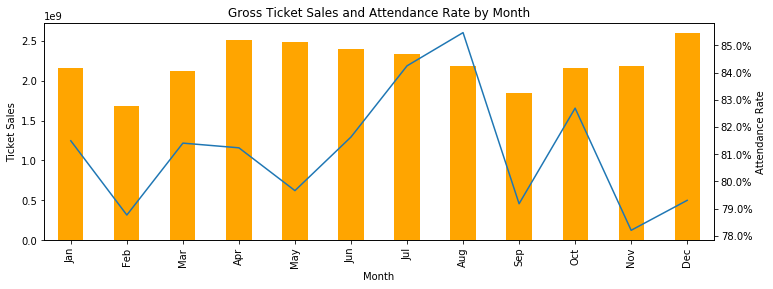

In [78]:
grp_mon_gross = df.groupby('month')

plt.figure(figsize=(12,4))

grp_mon_plot = grp_mon_gross['weekly_gross', 'seats_sold', 'max_seats'].sum()
grp_mon_plot['avg_cap'] = grp_mon_plot['seats_sold'] / grp_mon_plot['max_seats']
grp_mon_plot['avg_px'] = grp_mon_plot['weekly_gross'] / grp_mon_plot['seats_sold']

ax = grp_mon_plot['weekly_gross'].plot(kind = 'bar', color = 'orange', width = 0.45)
plt.ylabel('Ticket Sales')
plt.xlabel('Month')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2 = ax.twinx()
ax2.plot(range(12), grp_mon_plot['avg_cap'])
ax2.set_yticklabels(['{:,.1%}'.format(x) for x in ax2.get_yticks()])
plt.ylabel('Attendance Rate')
plt.title('Gross Ticket Sales and Attendance Rate by Month')

In [8]:
grp_mon_plot.head(12).sort_values(by = 'avg_cap')

,weekly_gross,seats_sold,max_seats,avg_cap,avg_px
month,,,,,
11,2.185307e+09,30532105,39039380,0.782085,71.574075
2,1.684381e+09,24443130,31031349,0.787692,68.910205
9,1.840296e+09,25270476,31914054,0.791829,72.823965
12,2.596720e+09,33591059,42355092,0.793082,77.303890
5,2.487109e+09,35592638,44677949,0.796649,69.877068
4,2.504606e+09,35713192,43961842,0.812368,70.131108
3,2.122200e+09,30863211,37911285,0.814090,68.761478
1,2.163338e+09,29416288,36096003,0.814946,73.542173
6,2.402778e+09,33052918,40489513,0.816333,72.694897


Text(0.5, 1.0, 'Average Ticket Price and Attendance Rate by Month')

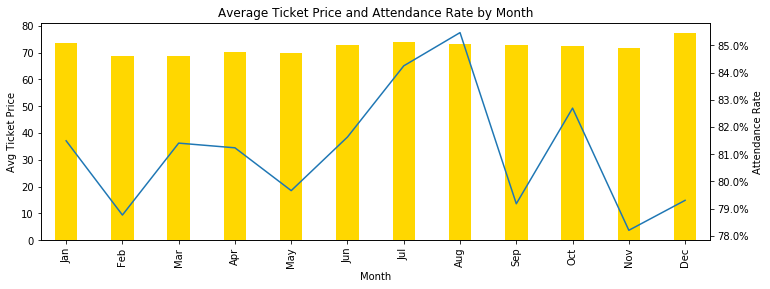

In [116]:
# fig_px_cap = go.Figure()
# fig_px_cap.add_trace(go.Bar(x = grp_mon_plot.index, y = grp_mon_plot.avg_px))
# fig_px_cap.add_trace(go.Scatter(x = grp_mon_plot.index, y = grp_mon_plot.avg_cap, yaxis = 'y1'))

# fig_px_cap.show()
# grp_mon_plot['avg_px'].plot(kind = 'line', color = 'r')
# grp_mon_plot['avg_cap'].plot(kind = 'line', color = 'b', secondary_y = True)


plt.figure(figsize=(12,4))
ax3 = grp_mon_plot['avg_px'].plot(kind = 'bar', color = 'gold', width = 0.4)
plt.ylabel('Avg Ticket Price')
plt.xlabel('Month')
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax4 = ax3.twinx()
ax4.plot(range(12), grp_mon_plot['avg_cap'])
ax4.set_yticklabels(['{:,.1%}'.format(x) for x in ax2.get_yticks()])
plt.ylabel('Attendance Rate')
plt.title('Average Ticket Price and Attendance Rate by Month')

#### Top 30

Text(0.5, 1.0, 'Top 30 Ticket Sales and Attendance Rate by Month')

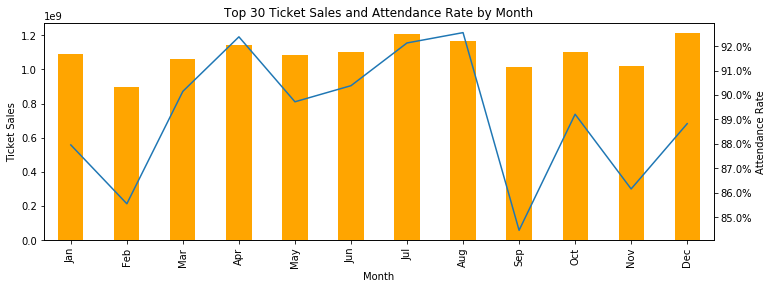

In [119]:
grp_mon_t30 = df_t30.groupby('month')

plt.figure(figsize=(12,4))

grp_mon_plot_t30 = grp_mon_t30['weekly_gross', 'seats_sold', 'max_seats'].sum()
grp_mon_plot_t30['avg_cap'] = grp_mon_plot_t30['seats_sold'] / grp_mon_plot_t30['max_seats']
grp_mon_plot_t30['avg_px'] = grp_mon_plot_t30['weekly_gross'] / grp_mon_plot_t30['seats_sold']

ax = grp_mon_plot_t30['weekly_gross'].plot(kind = 'bar', color = 'orange', width = 0.45)
plt.ylabel('Ticket Sales')
plt.xlabel('Month')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2 = ax.twinx()
ax2.plot(range(12), grp_mon_plot_t30['avg_cap'])
ax2.set_yticklabels(['{:,.1%}'.format(x) for x in ax2.get_yticks()])
plt.ylabel('Attendance Rate')
plt.title('Top 30 Ticket Sales and Attendance Rate by Month')

Text(0.5, 1.0, 'Top 30 Average Ticket Price and Attendance Rate by Month')

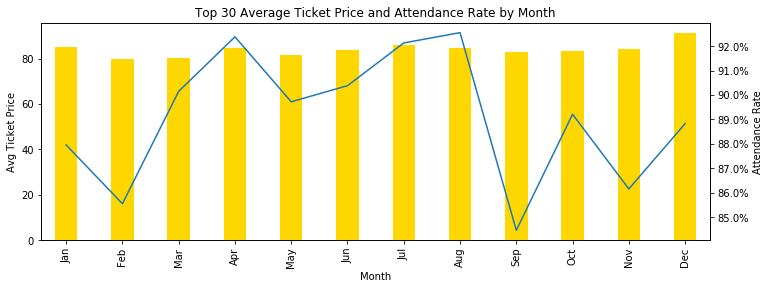

In [120]:
plt.figure(figsize=(12,4))
ax3 = grp_mon_plot_t30['avg_px'].plot(kind = 'bar', color = 'gold', width = 0.4)
plt.ylabel('Avg Ticket Price')
plt.xlabel('Month')
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax4 = ax3.twinx()
ax4.plot(range(12), grp_mon_plot_t30['avg_cap'])
ax4.set_yticklabels(['{:,.1%}'.format(x) for x in ax2.get_yticks()])
plt.ylabel('Attendance Rate')
plt.title('Top 30 Average Ticket Price and Attendance Rate by Month')

#### Bottom 200

Text(0.5, 1.0, 'Bottom 200 Ticket Sales and Attendance Rate by Month')

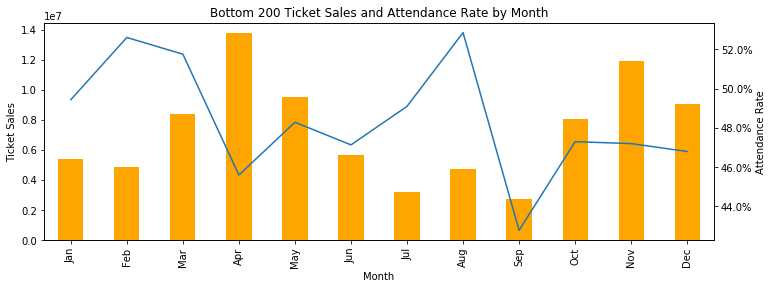

In [121]:
grp_mon_b200 = df_b200.groupby('month')

plt.figure(figsize=(12,4))

grp_mon_plot_b200 = grp_mon_b200['weekly_gross', 'seats_sold', 'max_seats'].sum()
grp_mon_plot_b200['avg_cap'] = grp_mon_plot_b200['seats_sold'] / grp_mon_plot_b200['max_seats']
grp_mon_plot_b200['avg_px'] = grp_mon_plot_b200['weekly_gross'] / grp_mon_plot_b200['seats_sold']

ax = grp_mon_plot_b200['weekly_gross'].plot(kind = 'bar', color = 'orange', width = 0.45)
plt.ylabel('Ticket Sales')
plt.xlabel('Month')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2 = ax.twinx()
ax2.plot(range(12), grp_mon_plot_b200['avg_cap'])
ax2.set_yticklabels(['{:,.1%}'.format(x) for x in ax2.get_yticks()])
plt.ylabel('Attendance Rate')
plt.title('Bottom 200 Ticket Sales and Attendance Rate by Month')

Text(0.5, 1.0, 'Bottom 200 Average Ticket Price and Attendance Rate by Month')

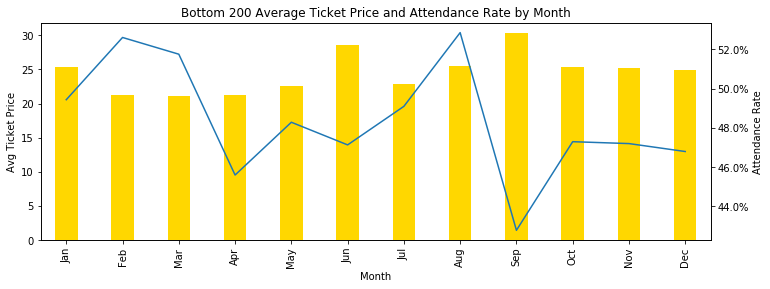

In [122]:
plt.figure(figsize=(12,4))
ax3 = grp_mon_plot_b200['avg_px'].plot(kind = 'bar', color = 'gold', width = 0.4)
plt.ylabel('Avg Ticket Price')
plt.xlabel('Month')
ax3.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax4 = ax3.twinx()
ax4.plot(range(12), grp_mon_plot_b200['avg_cap'])
ax4.set_yticklabels(['{:,.1%}'.format(x) for x in ax2.get_yticks()])
plt.ylabel('Attendance Rate')
plt.title('Bottom 200 Average Ticket Price and Attendance Rate by Month')

### Plot by Year

In [125]:
grp_yr = df.groupby('year')
grp_yr_theater = grp_yr[['theater']].nunique().reset_index()
fig_yr_theater = px.bar(grp_yr_theater, x = 'year', y = 'theater', title = 'Active Theaters', color = 'theater', labels = {'theater': 'Number of Active Theaters', 'year': 'Year'})

grp_yr_sales = grp_yr[['weekly_gross']].sum().reset_index()
fig_yr_sales = px.bar(grp_yr_sales, x = 'year', y = 'weekly_gross', title = 'Broadway Annual Ticket Sales', labels = {'weekly_gross': 'Annual Sales ($)', 'year': 'Year'})

### Plot by Theater

In [12]:
grp_theater = df.groupby(['theater', 'show'])['weekly_gross'].sum().reset_index().sort_values(by = 'weekly_gross', ascending = False)
fig_theater_sales = px.bar(grp_theater, x = 'theater', y = 'weekly_gross', color = 'show', title = 'Ticket Sales of Each Theater', labels = {'weekly_gross': 'Total Ticket Sales', 'theater': 'Theater'}).update_xaxes(tickangle = -90).update_layout(showlegend = False)

### Plots

In [126]:
fig_yr_sales.show()

In [104]:
fig_t30_sales.show()

In [114]:
fig_b200_sales.show()

In [38]:
fig_range.show()

In [14]:
fig_yr_theater.show()

In [40]:
fig_theater_sales.show()